In [2]:
# этот ноутбук относится к лабе 2.2.6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

radius = 3
# import matplotlib.colors as mcolors
# print(mcolors.CSS4_COLORS.keys())
# for i in range(10):
#   plt.scatter(i, (i + 2) % 3,marker=(6,1, i*40), linewidths=2, s=1000, color='deeppink')

# plt.scatter(range(len(f_res)),  f_res, marker='$хуй$', linewidths=0.1)

микроскоп -- https://vostok-7.ru/catalog/mikroskopy_otschyetnye_po_brinellyu/mpb_3_mikroskop_otschyetnyy_brinell/

расстояние между рисками -- 10.0, 9.8

In [3]:
d = np.array((2.2, 2.1, 0.8, 0.7, 1.9, 2.1, 0.75, 0.85, 2, 2.1, 0.85, 0.7,
2.1, 2.0, 0.9, 0.7, 2.1, 2.0, 0.8, 0.75, 2.0, 0.6, 0.6, 2.0)) # мм

In [4]:
# v ~ r*r/eta ~ 1/t
#temp = 22.30
t = (33.81, 35.66, 38.99, 43.63, 33.85) # с
#temp = 30.40                          30.90
t2 = (26.63, -1, 26.05, 19.6, 17.8, 23.93, 22.26) # с
#   temp:      40.92         40.85  40.80
t3 = (10.91, 10.35, 11.81, 16.20)
#   temp:      50.93 50.97  50.89
t4 = (6.95, 6.33,  7.60,  7.70)
#   temp:60.93     60.79 
t5 = (3.20,  7.63, 6.20, 2.80)

In [5]:
temp = (22.30, 22.30, 22.30, 22.30, 22.30,
30.40, 30.40, 30.40, 30.40, 30.40, 30.90, 30.90,
40.92, 40.92, 40.85, 40.80,
50.93, 50.97, 50.89, 50.89,
60.93, 60.93, 60.79, 60.79)

In [23]:
print(a.to_latex(index=False,

                  formatters={"name": str.upper},

                  float_format="{:.1f}".format,

))

\begin{tabular}{rrrrrrrrr}
\toprule
 diametr &  time &  temp &  rho &   v &   Re &  rho\_ball &    Nu &  Nu\_advanced \\
\midrule
     2.2 &  33.8 &  22.3 &  1.3 & 0.3 &  1.1 &       7.7 & 425.7 &        226.4 \\
     2.1 &  35.7 &  22.3 &  1.3 & 0.3 &  1.1 &       7.7 & 448.9 &        244.0 \\
     0.8 &  39.0 &  22.3 &  1.3 & 0.3 &  1.0 &       2.6 & 101.1 &         76.6 \\
     0.7 &  43.6 &  22.3 &  1.3 & 0.2 &  0.9 &       2.6 & 113.1 &         88.4 \\
     1.9 &  33.9 &  22.3 &  1.3 & 0.3 &  1.1 &       7.7 & 426.2 &        242.1 \\
     2.1 &  26.6 &  30.4 &  1.3 & 0.4 &  1.4 &       7.7 & 335.1 &        182.1 \\
     0.8 &  26.1 &  30.4 &  1.3 & 0.4 &  1.5 &       2.6 &  67.4 &         50.3 \\
     2.0 &  19.6 &  30.4 &  1.3 & 0.5 &  2.0 &       7.7 & 246.6 &        137.0 \\
     2.1 &  17.8 &  30.4 &  1.3 & 0.6 &  2.2 &       7.7 & 224.0 &        121.7 \\
     0.8 &  23.9 &  30.9 &  1.3 & 0.4 &  1.6 &       2.6 &  61.9 &         46.2 \\
     0.7 &  22.3 &  30.9 &  1.3 & 0.4 & 

/tmp/ipykernel_253738/2476672128.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(a.to_latex(index=False,


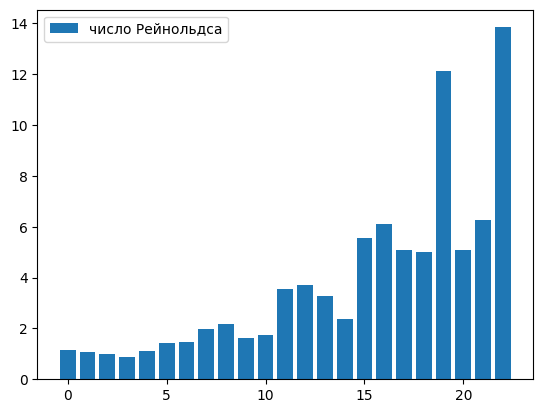

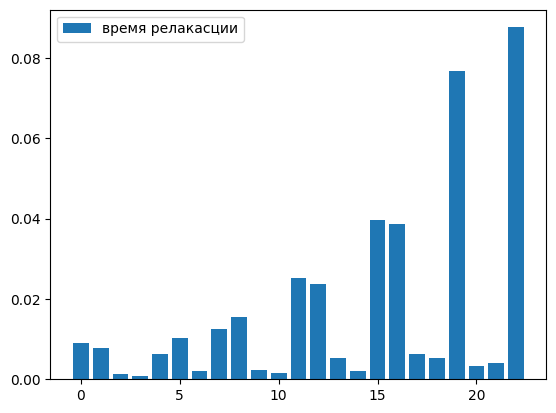

In [19]:
a = pd.DataFrame()
a['diametr'] = d
a['time'] = t + t2 + t3 + t4 + t5
a['temp'] = temp
a['rho'] = a['temp'] / 2500 + 317/250 
a['v'] = 10 / a['time']
a['Re'] = a['v'] * radius * a['rho']
a['rho_ball'] = a['diametr']
for i in range(len(a['rho_ball'])):
  a['rho_ball'][i] = (7.7 if a['rho_ball'][i] > 1 else 2.6)
a['Nu'] = 0.222 * 9.81 * radius ** 2 * (a['rho_ball'] - a['rho']) / a['v']
a['Nu_advanced'] = a['Nu'] / (1 + 2.4 * (a['diametr'] / (2 * radius)))
a = a.drop(labels=6)
a
plt.bar(
  range(len(a['Re'])),
  a['Re'],
  label="число Рейнольдса"
)
plt.legend(loc='best')
plt.show()
plt.bar(
  range(len(a['Re'])),
  2 * a['diametr']**2 * a['rho_ball'] / (36 * a['Nu_advanced']),
  label="время релакасции"
)
plt.legend(loc='best')
plt.show()

 
77.94 x + 2.769 eror: 0.0013420572278307413


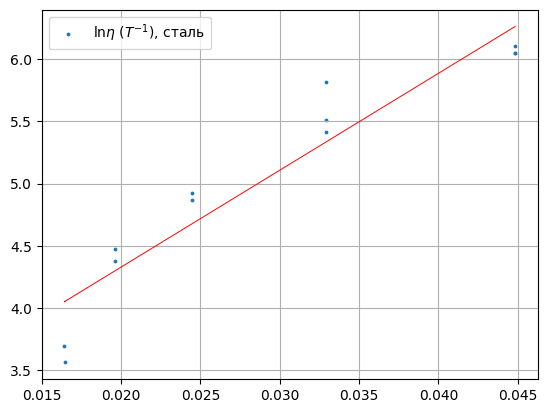

In [7]:
tmp = a.loc[a['rho_ball'] == 7.7]

oy = np.log(tmp['Nu'])
ox = 1 / tmp['temp']
# ox = a["Nu"]
plt.scatter(
  ox,
  oy,
  s=3,
  label="ln$\eta \ (T^{-1})$, сталь"
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.7, color='red', linestyle='-')
print(str(p1), "eror:", res[0][0] ** 0.5/((z1[0])**2))
plt.savefig("graph steel.png")
plt.grid()
plt.legend(loc='best')
plt.show()

 
66.72 x + 1.818 eror: 0.001174919152448583


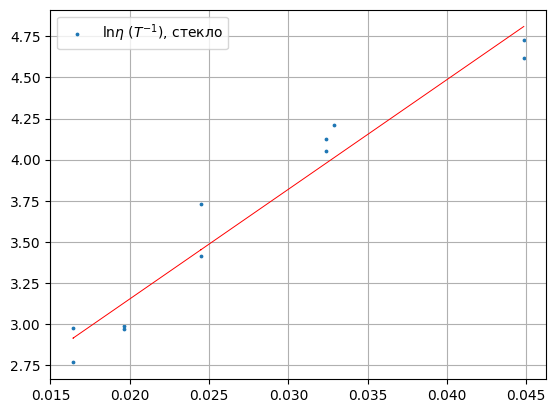

In [8]:
tmp = a.loc[a['rho_ball'] == 2.6]

oy = np.log(tmp['Nu'])
ox = 1 / tmp['temp']
# ox = a["Nu"]
plt.scatter(
  ox,
  oy,
  s=3,
  label="ln$\eta \ (T^{-1})$, стекло"
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.7, color='red', linestyle='-')
print(str(p1), "eror:", res[0][0] ** 0.5/((z1[0])**2))
plt.savefig("graph glass.png")
plt.grid()
plt.legend(loc='best')
plt.show()